## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 1. Importing the Data and the Required Packages
importing pandas, numpy, matplotlib, seaborn and the data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

Insights:
- There are 1000 rows and 8 columns in this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Insights:
- Ther are five(5) object data types and three(3) integer data types

### 2.0 Data checks and understanding
- check for missing data
- check for duplicates
- check for the datatypes
- check the statistics
- check the numerical and categorical datatypes

In [7]:
## checking the statistics of the datatype
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
- since there are three(3) numerical features, there are only summaries for the three features in the dataset -- math_score, reading_score, writing_score
- the dataset are closely aligned
- the mean were close to onle another 66.08, 69.169, 68.054 respectively
- the three numerical columns have a bit similar standard deviation (15.163, 14.600, 15.195)

In [8]:
## checking the unique data in the columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

observation:
- there are two genders
- five race_ethicity
- six parental_level_of_education
- 2 lunch 
- two test_preparation score
- 81, 72, and 77 math_score, reading_score, and writing_score respectively

In [9]:
## checking for missing dataset
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation:
- There are no missing data in the dataset

In [18]:
## chicking for duplicates
df.duplicated().sum()

0

observation:
- There are zero duplicates in the dataset

In [21]:
## checking the datatypes
categorical_features = [features for features in df.columns if df[features].dtypes =='O']
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

##printing the number of columns
print('There are {} categorical features in the dataset:{}'.format(len(categorical_features), categorical_features))
print('There are {} numerical featurs in the dataset:{}'.format(len(numerical_features), numerical_features))

There are 5 categorical features in the dataset:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
There are 3 numerical featurs in the dataset:['math_score', 'reading_score', 'writing_score']


In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Observation:
- There are no missing data and duplicated data in the dataset, so there is no need for imputation and deletion

3. Exploratory Data Analysis (EDA)
- univariate, bivariate, and multivariate analysis

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
## need to create two new features (Total_scores and Average_scores)

df['Total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_score']= df['Total_score']/3

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

#### Univariate Analysis of each columns

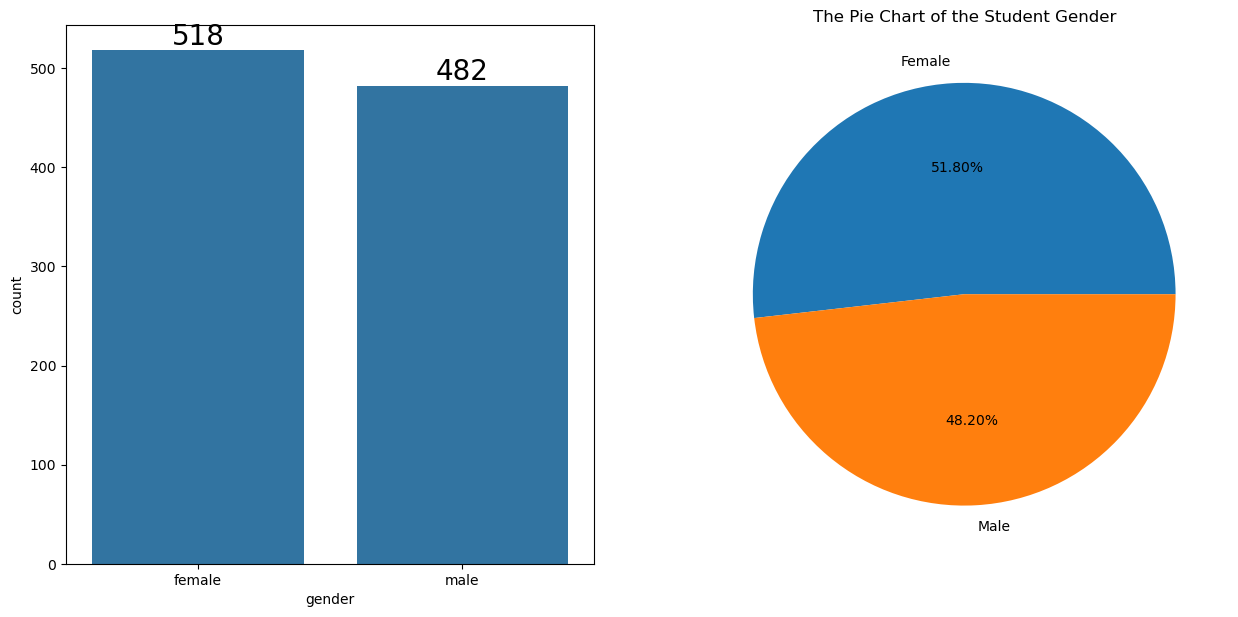

In [84]:
# univariate for gender columnn
f, ax= plt.subplots(1,2, figsize=(15,7))

plt.title('The Gender of Students in the school')
sns.countplot(data=df, ax= ax[0], x=df['gender'])

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.title('The Pie Chart of the Student Gender')
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.show()

insights:
- There are more female student than male student in the class
- There are 518(51.8%) female students and there are 482(48.2)% male students

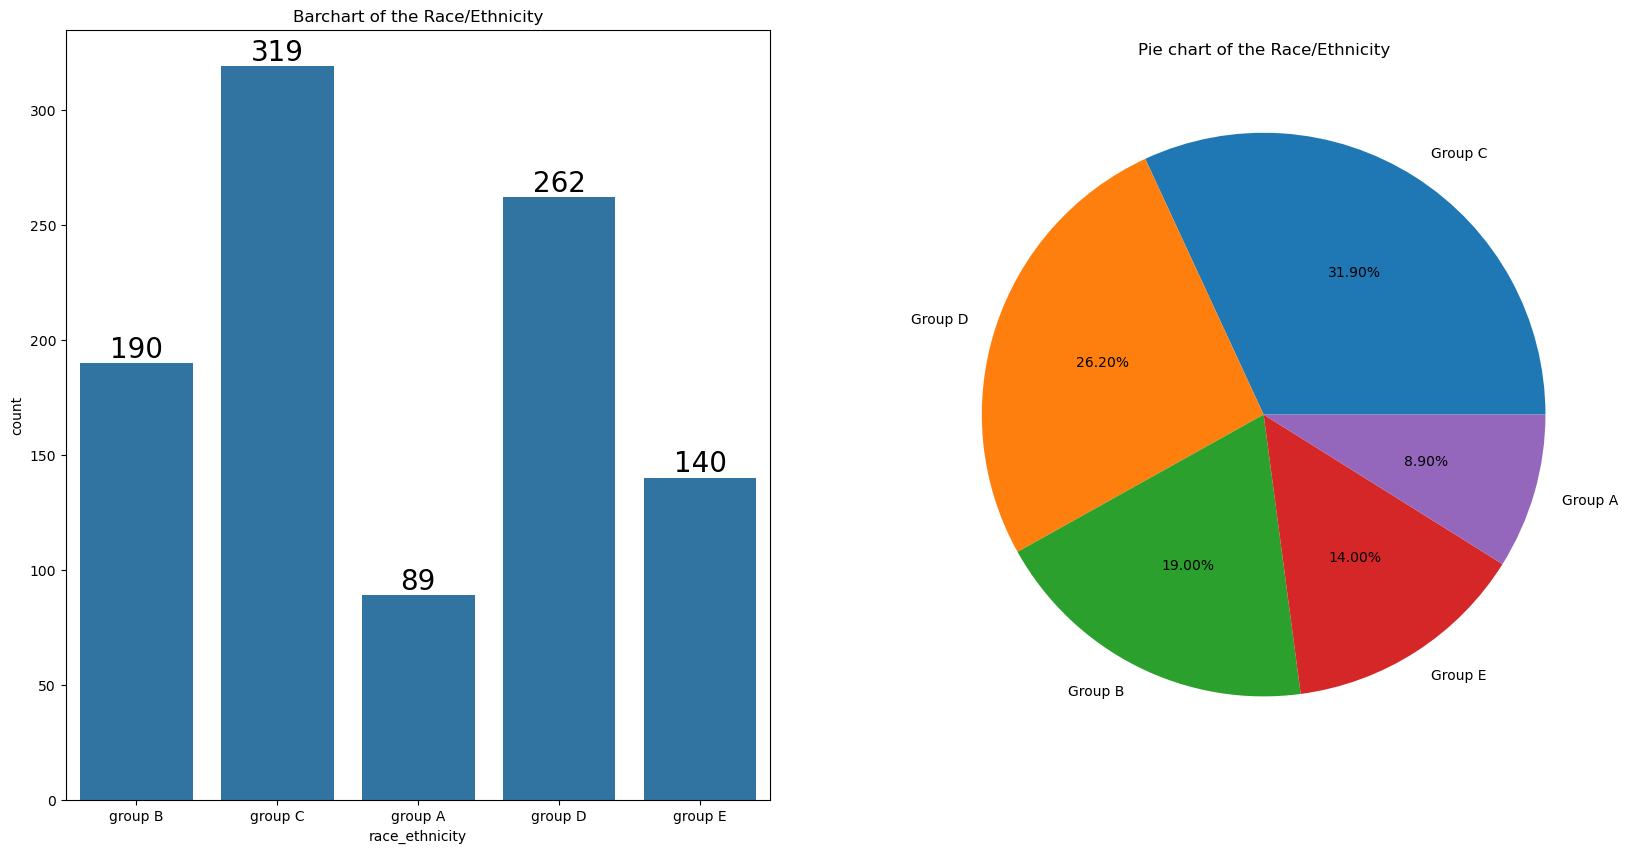

In [92]:
## Univariate analysis of the Race Ethnicity

f,ax= plt.subplots(1,2, figsize=(20,10))

plt.title('Univariate Analysis of the Race/Ethnicity of Students')

ax[0].set_title('Barchart of the Race/Ethnicity')
sns.countplot(data=df, x=df['race_ethnicity'], ax=ax[0] )

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size='20')

ax[1].set_title('Pie chart of the Race/Ethnicity')
plt.pie(df['race_ethnicity'].value_counts(), labels= ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], autopct='%1.2f%%')

plt.show()

Insights:
- Group C is the most common ethnicity amoung the students with a total counts of 319, which is 31.9% of the entire student population
- followed by Group D with a population count of 262 (26.2%) and Group B with a population count of 190 (19%)
- followed by Group E and A with population count of 140(14%) and 89(8.9%) respectively

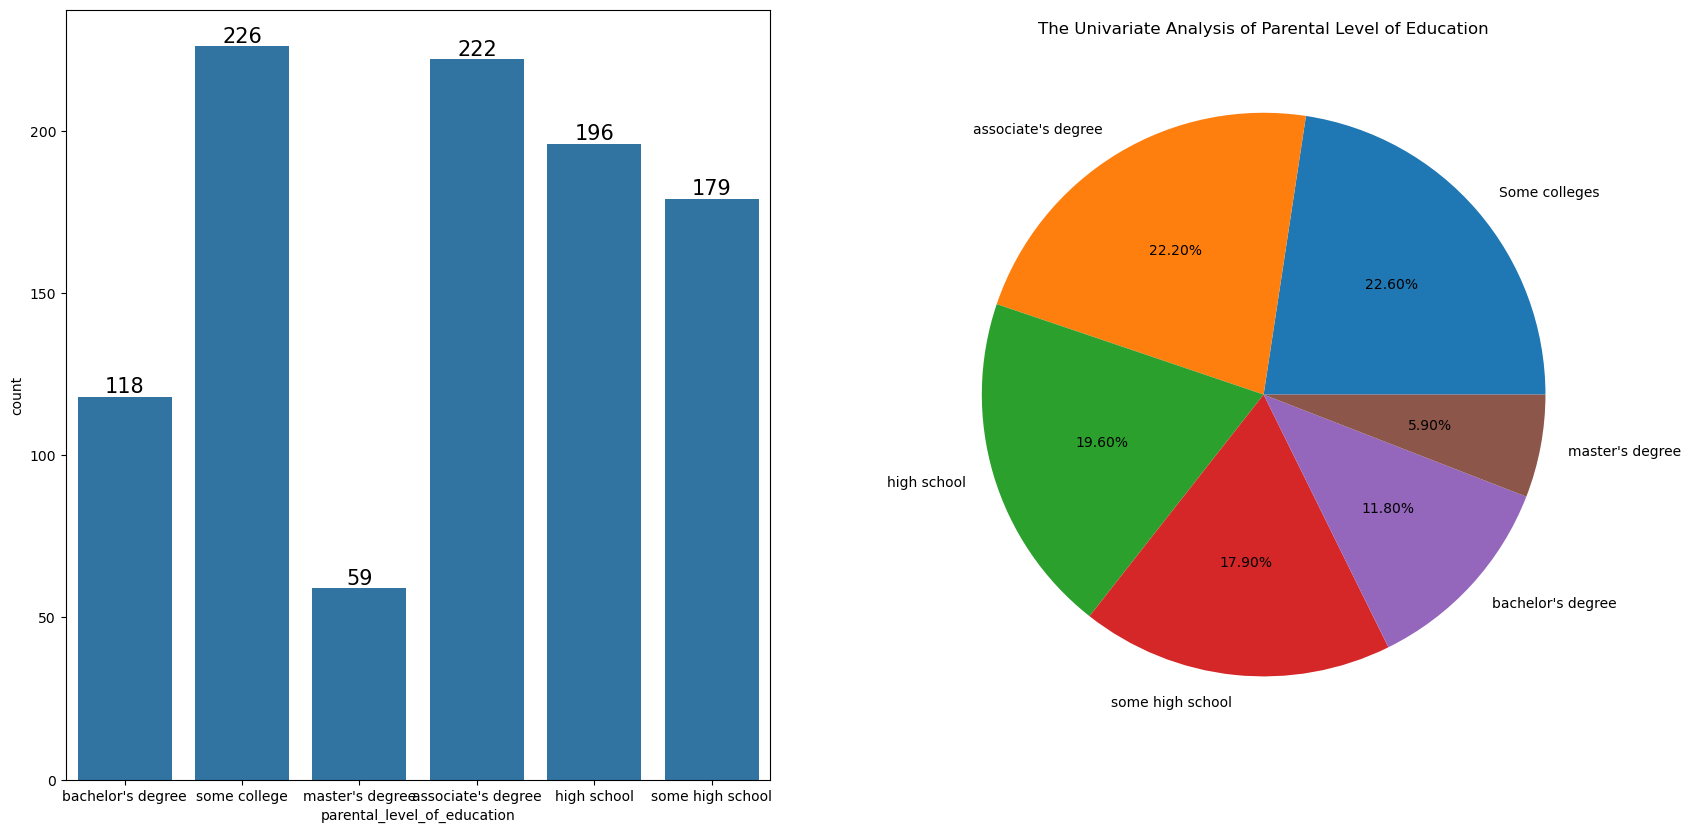

In [98]:
f, ax= plt.subplots(1,2, figsize=(20,10))

plt.title('The Univariate Analysis of Parental Level of Education')
sns.countplot(x= df['parental_level_of_education'], ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)


plt.pie(df['parental_level_of_education'].value_counts(), labels=['Some colleges', "associate's degree", 'high school', 'some high school',"bachelor's degree", "master's degree"], autopct= '%1.2f%%')

plt.show()


insights:

- There are five categories for parental level of education with students with parents with "some level of education" being the highest with a count of 226 (22.6%), closely followed by parents with 'Associate degree" with a count of 222 (22.2%).
- and the lowest count are parents with "master's degrees" with a count of 59 (5.9% of the entire population)

In [100]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

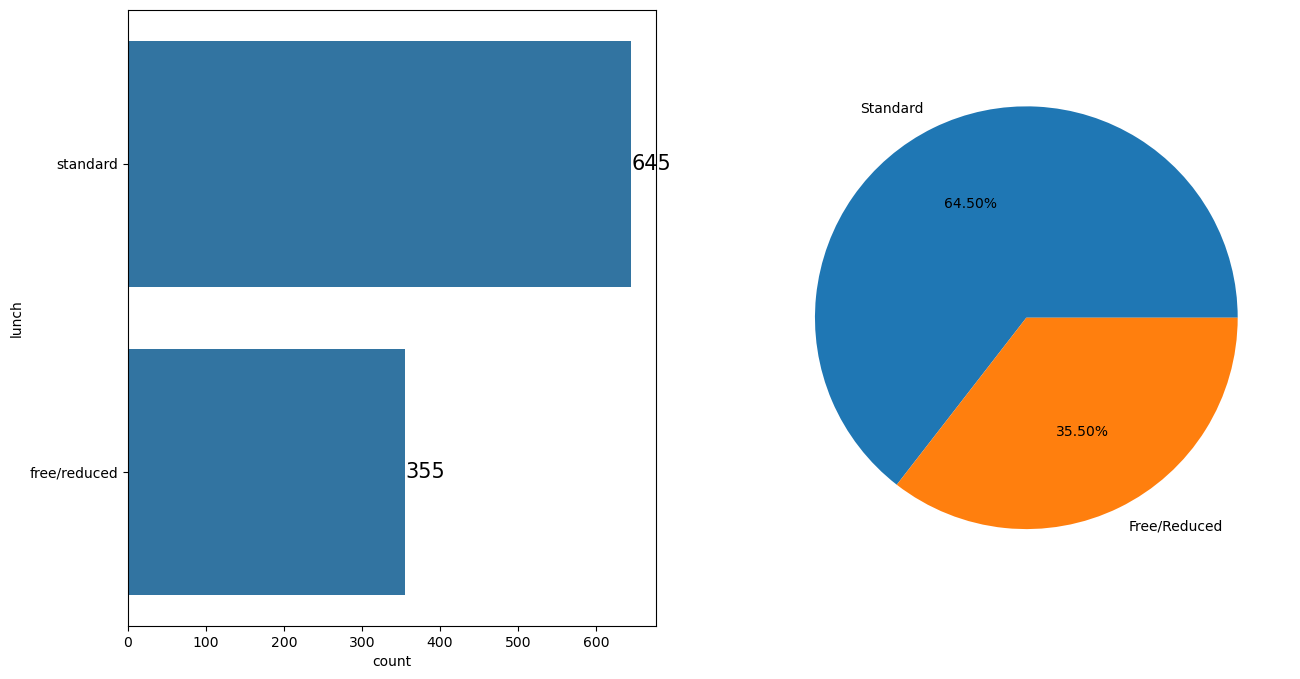

In [110]:
f, ax= plt.subplots(1,2, figsize= (15,8))

sns.countplot(df['lunch'], ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size=15, color='black')

plt.pie(df['lunch'].value_counts(), autopct='%1.2f%%', labels= ['Standard', 'Free/Reduced'])
plt.show()

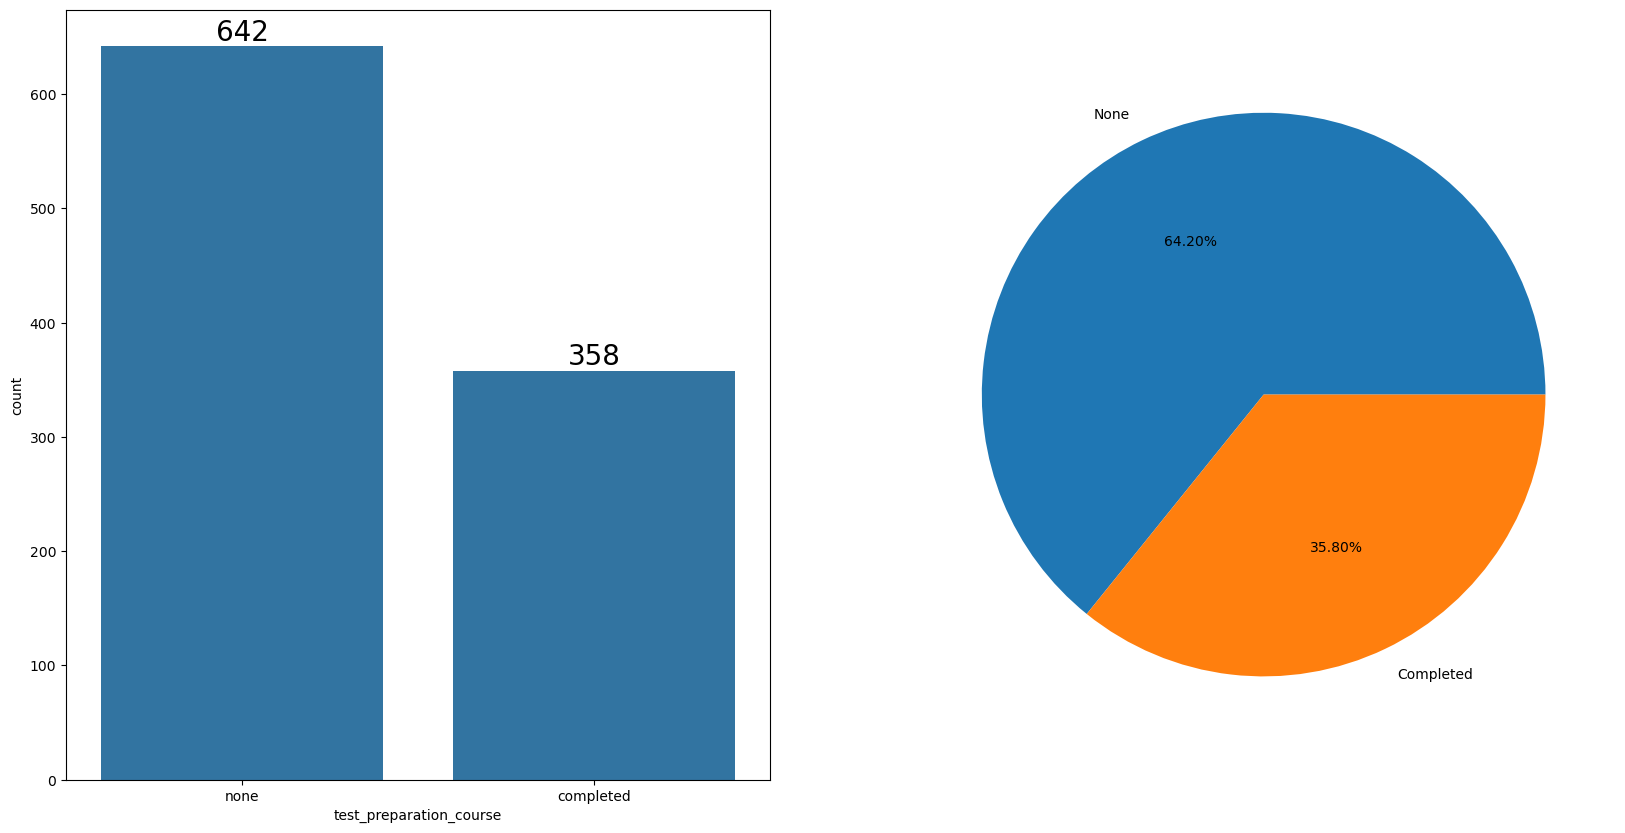

In [120]:
## Univariate Analysis for Test_preparation_Course

f, ax= plt.subplots(1,2, figsize=(20,10))

sns.countplot(data=df, x='test_preparation_course', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, size=20, color='black')

plt.pie(df['test_preparation_course'].value_counts(), autopct='%1.2f%%', labels= ['None', 'Completed'])
plt.show()

Insights and observation:
- 35.8% of the 1000 students completed their test preparation course while the rest doesn't prepare for thier exams

In [121]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average_score'],
      dtype='object')

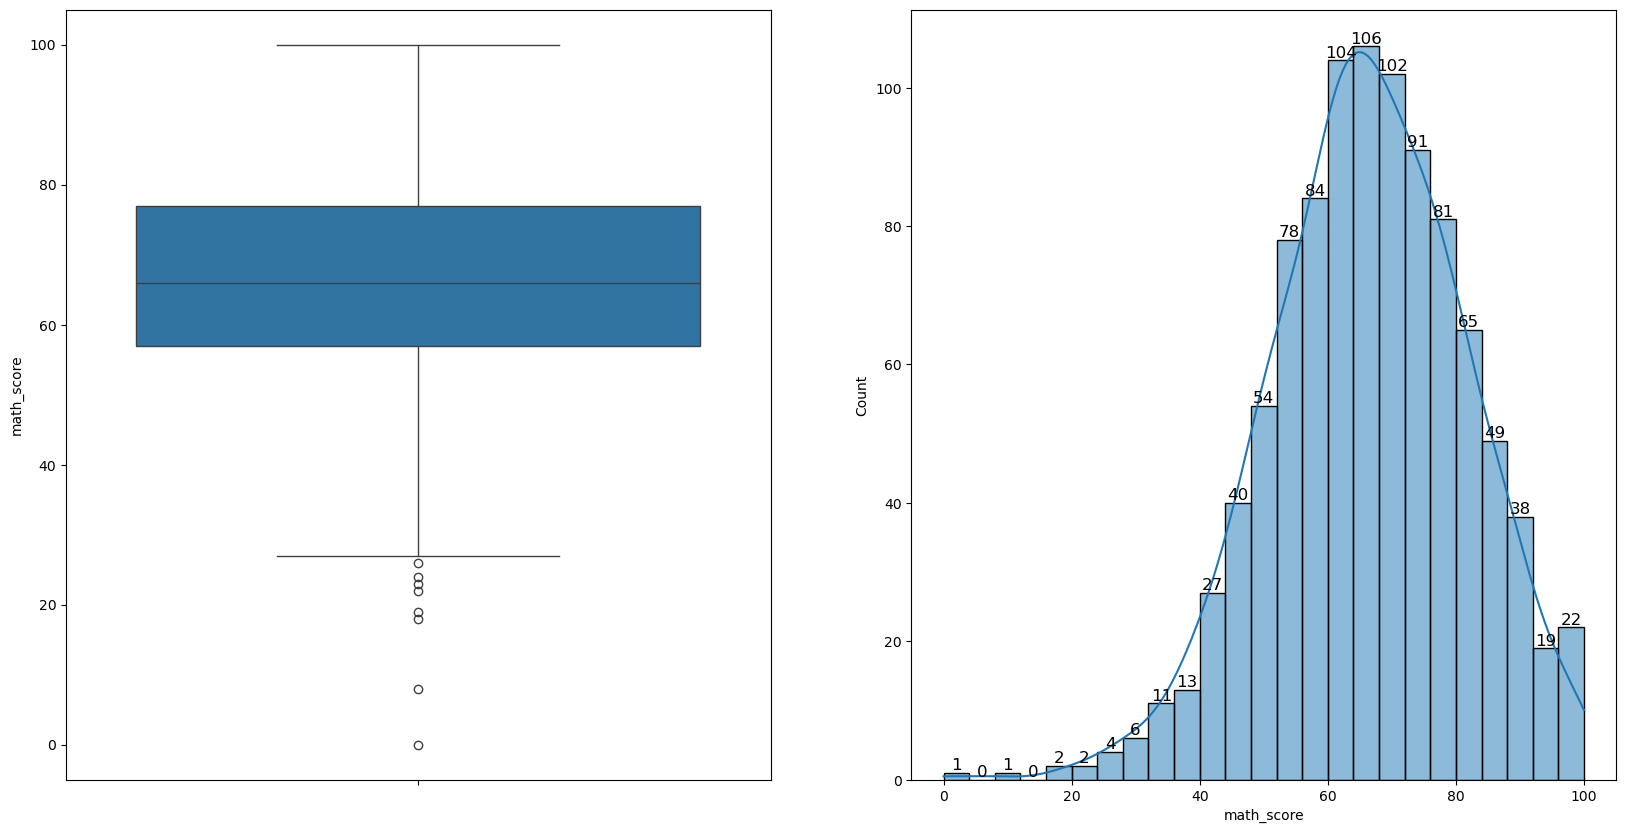

In [145]:
## Univariate analysis of the Math_score variable

f,ax= plt.subplots(1,2, figsize=(20,10))

sns.histplot(x=df['math_score'],kde=True, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

sns.boxplot(df['math_score'], ax=ax[0])
plt.show()

Insight and observation:
- Based on the histogram, the dataset is normally distributed with a little tailed to the left
- the lower and the upper boundaries are 25 and 100 respecively. 
- there were about 7 outliers in the dataset

In [147]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

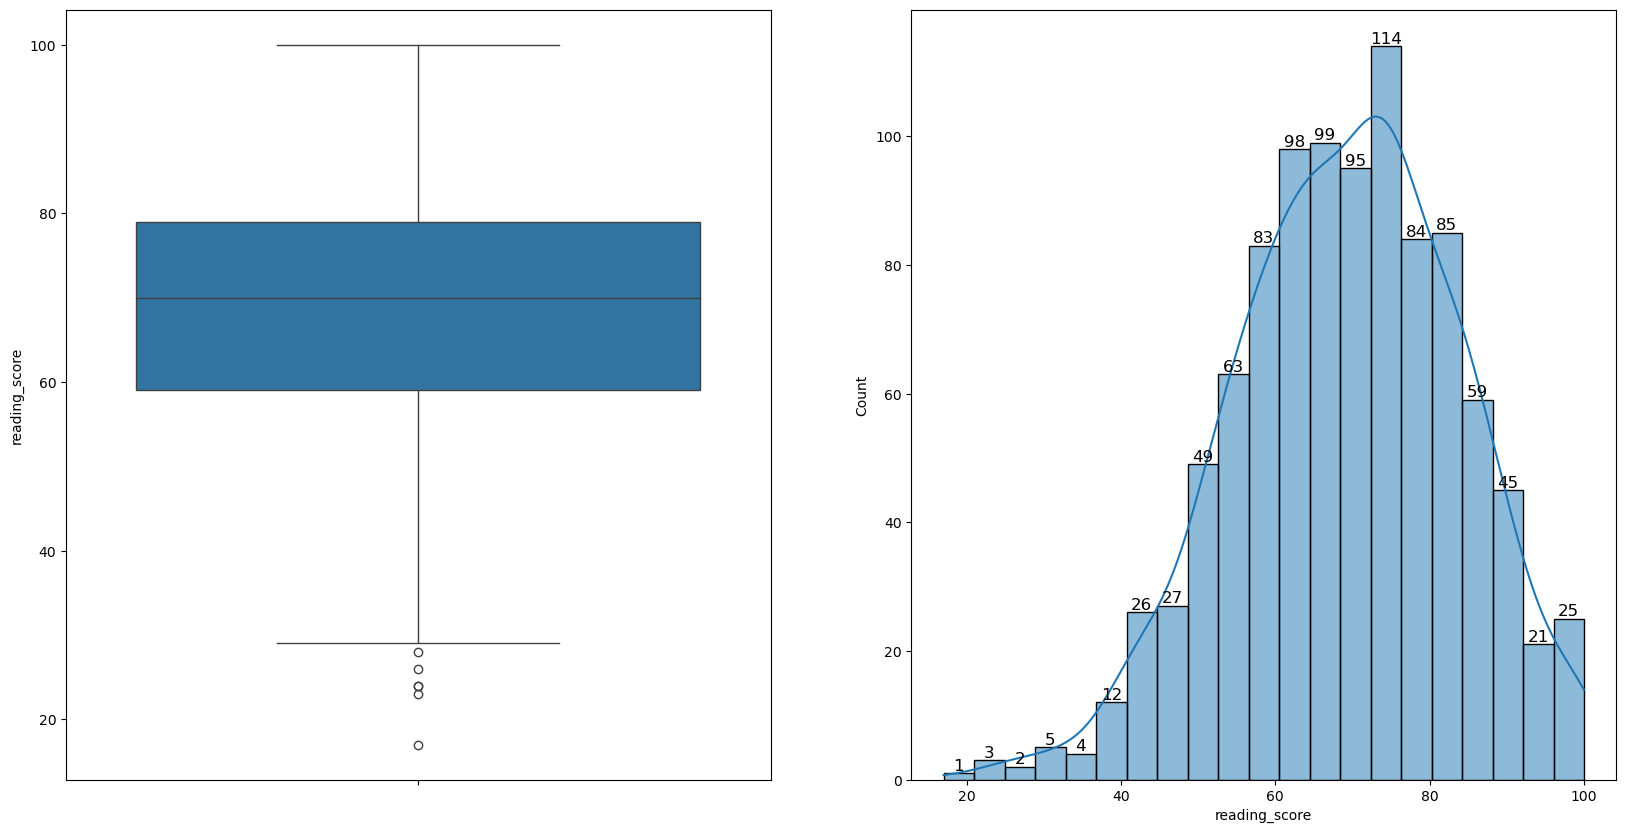

In [148]:
## Univariate analysis of the Reading Score

f, ax=plt.subplots(1,2, figsize=(20,10))

sns.boxplot(df['reading_score'], ax=ax[0])

sns.histplot(df['reading_score'], ax=ax[1], kde=True)
for container in ax[1].containers:
    ax[1].bar_label(container, size=12, color='black')

plt.show()

Insight and observation:
- there are six outliers in thedataset
- the dataset is normally distributed based on the histogram and the boxplot visualization
- the lower and the uper boundary are 25 and 100 respectively

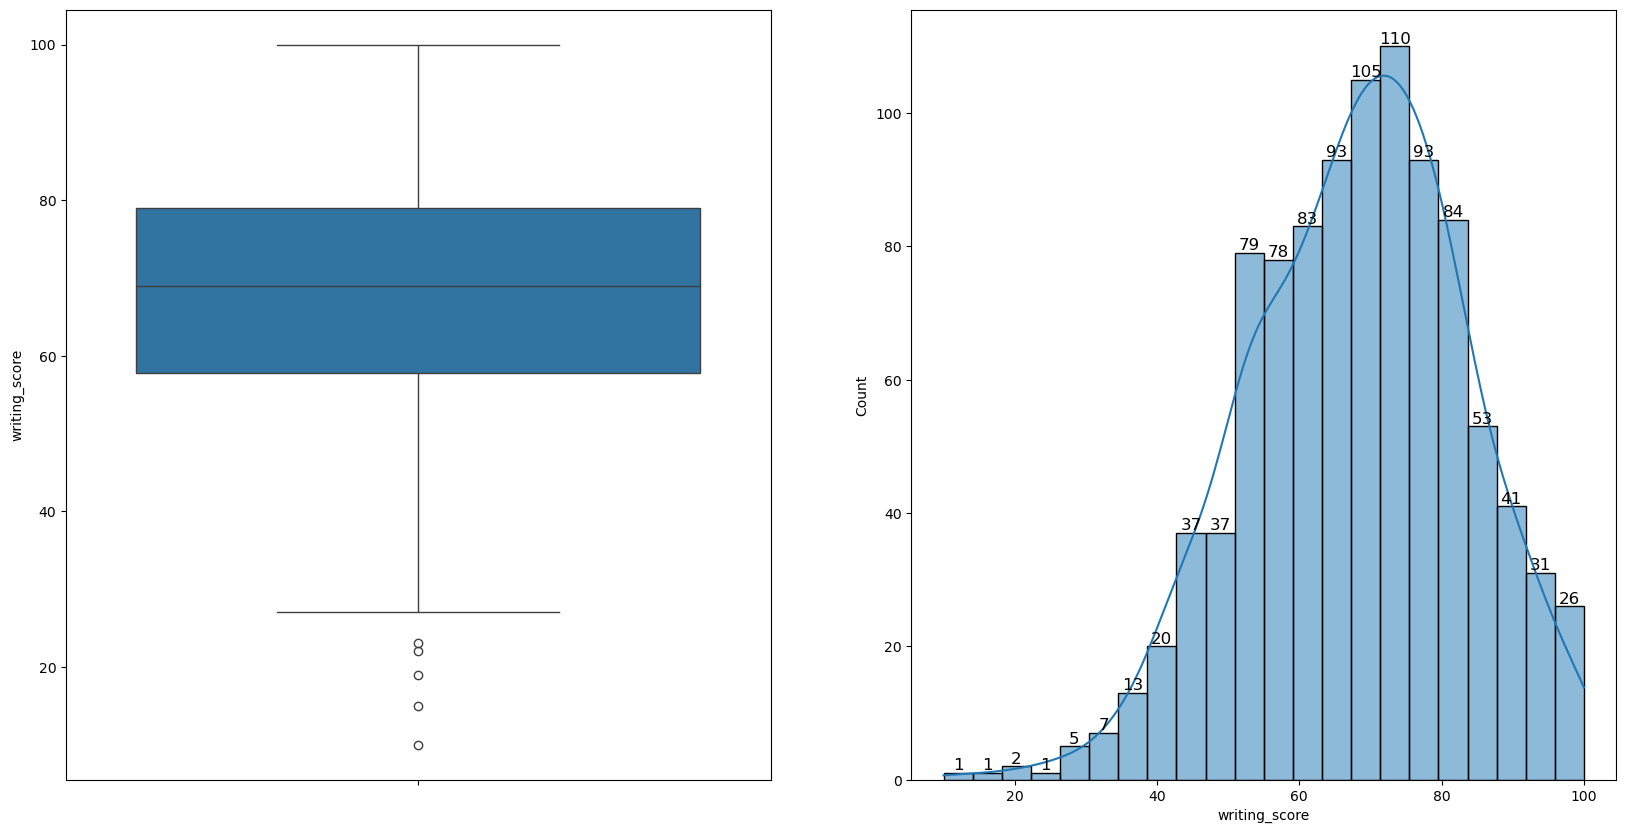

In [149]:
## Univariate analysis of the Writing Score

f, ax=plt.subplots(1,2, figsize=(20,10))

sns.boxplot(df['writing_score'], ax=ax[0])

sns.histplot(df['writing_score'], ax=ax[1], kde=True)
for container in ax[1].containers:
    ax[1].bar_label(container, size=12, color='black')

plt.show()

### Bivariate Analysis of the Dataset

In [150]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


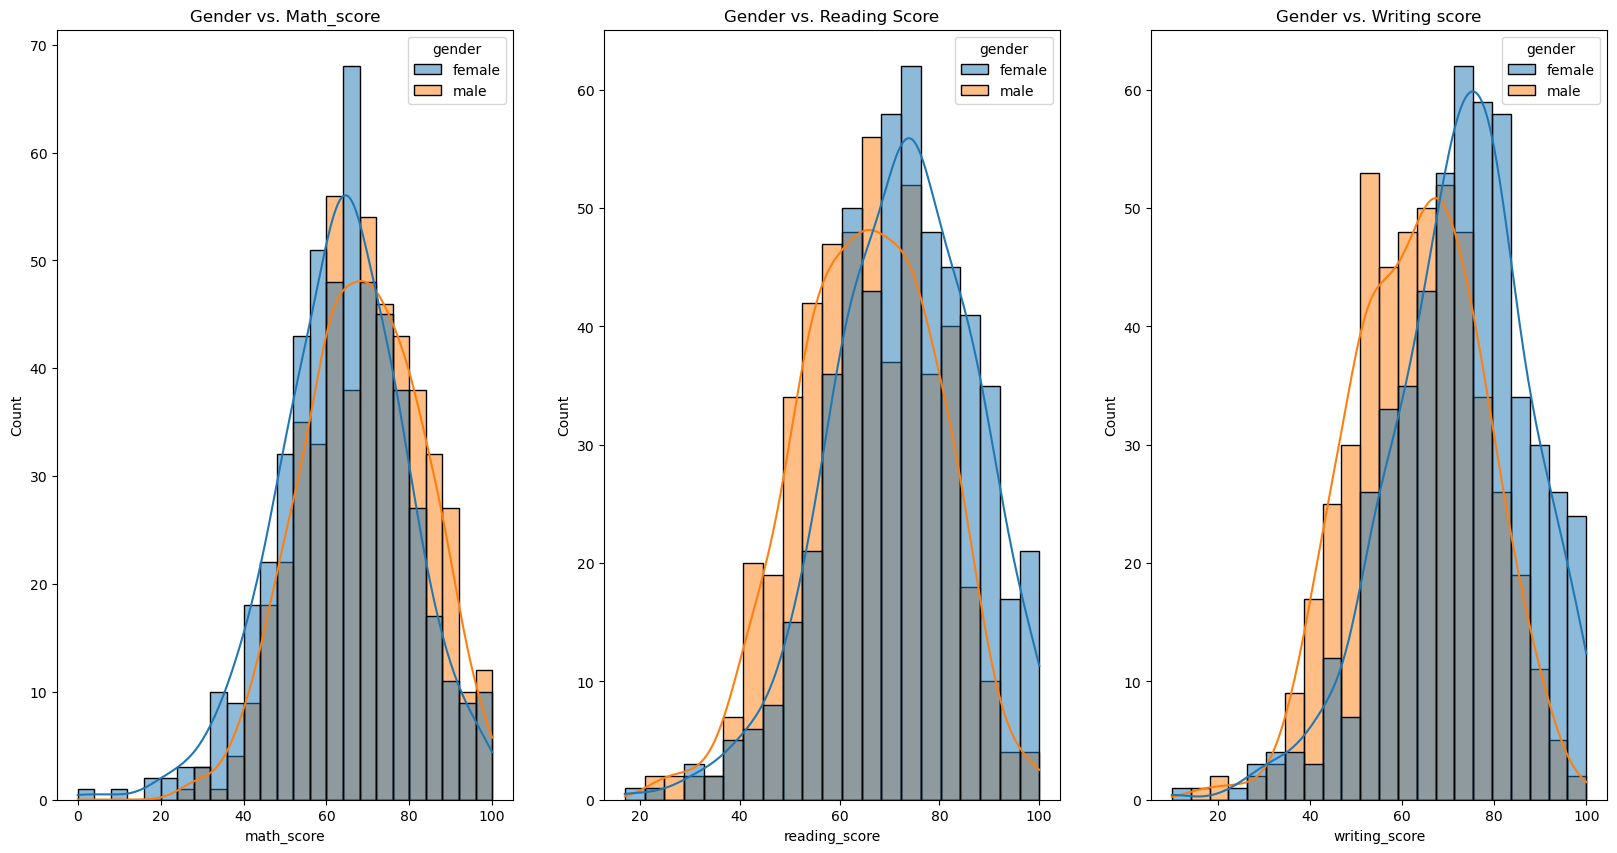

In [162]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title("Gender vs. Math_score")
sns.histplot(data=df, hue='gender', x="math_score", kde=True)

plt.subplot(1,3,2)
plt.title("Gender vs. Reading Score")
sns.histplot(data=df, x='reading_score', hue='gender', kde=True)

plt.subplot(1,3,3)
plt.title('Gender vs. Writing score')
sns.histplot(data=df, x='writing_score', hue='gender', kde=True)
plt.show()

In [169]:
math=df.groupby('gender')['math_score'].mean()
reading=df.groupby('gender')['reading_score'].mean()
writing=df.groupby('gender')['writing_score'].mean()

print("Math score average is:", math)
print('\n')
print("Reading score average is:", reading)
print('\n')
print("Writing score average is:", writing)

Math score average is: gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64


Reading score average is: gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64


Writing score average is: gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64
